In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import os
# # Replace 'MyDrive' and 'MARIDA' with your desired path
# dataset_path = '/content/drive/MyDrive/MARIDA'
# if not os.path.exists(dataset_path):
#     os.makedirs(dataset_path)


In [ ]:
# # Replace the URL with the actual download link of the MARIDA dataset
# dataset_url = 'https://zenodo.org/records/5151941/files/MARIDA.zip'
# !wget -P {dataset_path} {dataset_url}


--2025-03-05 23:37:57--  https://zenodo.org/records/5151941/files/MARIDA.zip
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1164612748 (1.1G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/MARIDA/MARIDA.zip’

MARIDA.zip          100%[===================>]   1.08G  15.1MB/s    in 75s     

2025-03-05 23:39:13 (14.7 MB/s) - ‘/content/drive/MyDrive/MARIDA/MARIDA.zip’ saved [1164612748/1164612748]



In [ ]:
# import zipfile

# # Define the path to the downloaded ZIP file
# zip_file_path = os.path.join(dataset_path, 'MARIDA.zip')

# # Extract the ZIP file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(dataset_path)


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/MARIDA'


In [ ]:
# List the files in the dataset directory
os.listdir(dataset_path)


['MARIDA.zip', 'patches', 'shapefiles', 'splits', 'labels_mapping.txt']

In [ ]:
dataset_path

'/content/drive/MyDrive/MARIDA'

# Check patches

In [ ]:
os.listdir(dataset_path + "/patches/")

['S2_1-12-19_48MYU',
 'S2_11-1-19_19QDA',
 'S2_11-6-18_16PCC',
 'S2_12-1-17_16PCC',
 'S2_12-1-17_16PEC',
 'S2_12-1-19_16PEC',
 'S2_12-12-20_16PCC',
 'S2_13-12-18_16PCC',
 'S2_14-11-18_48PZC',
 'S2_14-12-20_18QYF',
 'S2_14-3-20_18QYF',
 'S2_14-9-18_16PCC',
 'S2_15-10-20_18QYF',
 'S2_15-11-20_16PCC',
 'S2_15-9-20_18QYF',
 'S2_16-2-18_16PEC',
 'S2_17-7-16_51PTS',
 'S2_18-1-18_48PZC',
 'S2_18-5-19_51PTS',
 'S2_18-9-20_16PCC',
 'S2_18-9-20_16PDC',
 'S2_19-3-20_18QYF',
 'S2_19-9-18_16PCC',
 'S2_19-9-18_16PDC',
 'S2_20-10-20_18QYF',
 'S2_20-4-18_30VWH',
 'S2_21-2-17_16PCC',
 'S2_21-2-18_16PCC',
 'S2_22-12-20_18QYF',
 'S2_22-3-20_18QWF',
 'S2_23-1-21_18QYF',
 'S2_23-9-20_16PCC',
 'S2_24-10-18_16PDC',
 'S2_24-11-19_48PZC',
 'S2_24-3-20_18QYF',
 'S2_24-4-19_36JUN',
 'S2_24-8-20_16PCC',
 'S2_25-5-19_48MXU',
 'S2_26-2-18_16PCC',
 'S2_27-1-19_16PCC',
 'S2_27-1-19_16QED',
 'S2_28-9-20_16PCC',
 'S2_28-9-20_16PDC',
 'S2_29-11-15_16PEC',
 'S2_29-11-20_18QYF',
 'S2_29-12-20_18QYF',
 'S2_29-8-17_51RVQ',


In [ ]:
os.listdir(dataset_path + "/patches/S2_20-10-20_18QYF/")[:3]

['S2_20-10-20_18QYF_0.tif',
 'S2_20-10-20_18QYF_0_cl.tif',
 'S2_20-10-20_18QYF_0_conf.tif']

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.ndimage import label, find_objects
import matplotlib.patches as patches

def display_mar!pip install rasterioida_instance(image_path , patch = None):
    """
    Displays a MARIDA dataset instance:
    - Satellite image
    - Class mask
    - Confidence mask
    - Confidence-weighted class mask
    - Satellite image with bounding boxes around classified areas

    Args:
        image_path (str): Path to the .tif patch (satellite image).
    """
    image_path = dataset_path +  image_path
    # Load the satellite image
    with rasterio.open(image_path) as src:
        image = src.read()

    # Construct corresponding mask and confidence file paths
    mask_path = image_path.replace('.tif', '_cl.tif')
    conf_path = image_path.replace('.tif', '_conf.tif')

    if not os.path.exists(mask_path):
        print(f"Class mask file not found: {mask_path}")
        return
    if not os.path.exists(conf_path):
        print(f"Confidence mask file not found: {conf_path}")
        return

    # Load the class mask
    with rasterio.open(mask_path) as src:
        class_mask = src.read(1)  # Single-band class mask

    # Load the confidence mask
    with rasterio.open(conf_path) as src:
        conf_mask = src.read(1)  # Single-band confidence mask

    # Normalize confidence values between 0 and 1
    conf_mask = conf_mask / conf_mask.max() if conf_mask.max() > 0 else conf_mask

    # Compute confidence-weighted class mask
    weighted_mask = class_mask * conf_mask

    # Convert RGB image (assuming first three bands correspond to R, G, B)
    if image.shape[0] >= 3:
        rgb_image = np.dstack((image[0], image[1], image[2]))
    else:
        rgb_image = np.stack((image[0],) * 3, axis=-1)  # Convert grayscale to RGB

    # Label connected components in the class mask
    labeled_mask, num_features = label(class_mask > 0)

    # Find individual objects in the labeled mask
    class_objects = find_objects(labeled_mask)

    # Create a figure
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    if patch:
        fig.suptitle(f"MARIDA Patch  - IMAGE SET NO : {patch}", fontsize=16, fontweight="bold")
    # Display Satellite Patch
    axes[0].imshow(rgb_image)
    axes[0].set_title("Satellite Patch")
    axes[0].axis("off")

    # Display Class Mask
    axes[1].imshow(class_mask, cmap="jet")
    axes[1].set_title("Class Mask")
    axes[1].axis("off")

    # Display Confidence Mask
    im = axes[2].imshow(conf_mask, cmap="gray")
    axes[2].set_title("Confidence Mask")
    axes[2].axis("off")
    fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

    # Display Confidence-Weighted Class Mask
    im2 = axes[3].imshow(weighted_mask, cmap="viridis")
    axes[3].set_title("Confidence-Weighted Class Mask")
    axes[3].axis("off")
    fig.colorbar(im2, ax=axes[3], fraction=0.046, pad=0.04)

    # Display Satellite Image with Bounding Boxes
    axes[4].imshow(rgb_image)
    axes[4].set_title("Satellite Image with ROIs")
    axes[4].axis("off")

    # Draw bounding boxes around **each distinct object**
    if class_objects:
        for i, obj in enumerate(class_objects):
            if obj is not None:
                y_slice, x_slice = obj  # Extract slice objects
                y_min, y_max = y_slice.start, y_slice.stop
                x_min, x_max = x_slice.start, x_slice.stop

                # Draw rectangle around each detected object
                rect = patches.Rectangle(
                    (x_min, y_min),  # x, y coordinates (top-left corner)
                    x_max - x_min,  # width
                    y_max - y_min,  # height
                    linewidth=2, edgecolor='red', facecolor='none'
                )
                axes[4].add_patch(rect)



    plt.show()

# Example usage:
# display_marida_instance(dataset_path + "/patches/S2_13-12-18_16PCC/S2_13-12-18_16PCC_5.tif")



In [ ]:
len(os.listdir(dataset_path + "/patches/S2_20-10-20_18QYF/"))/3

4.0

0


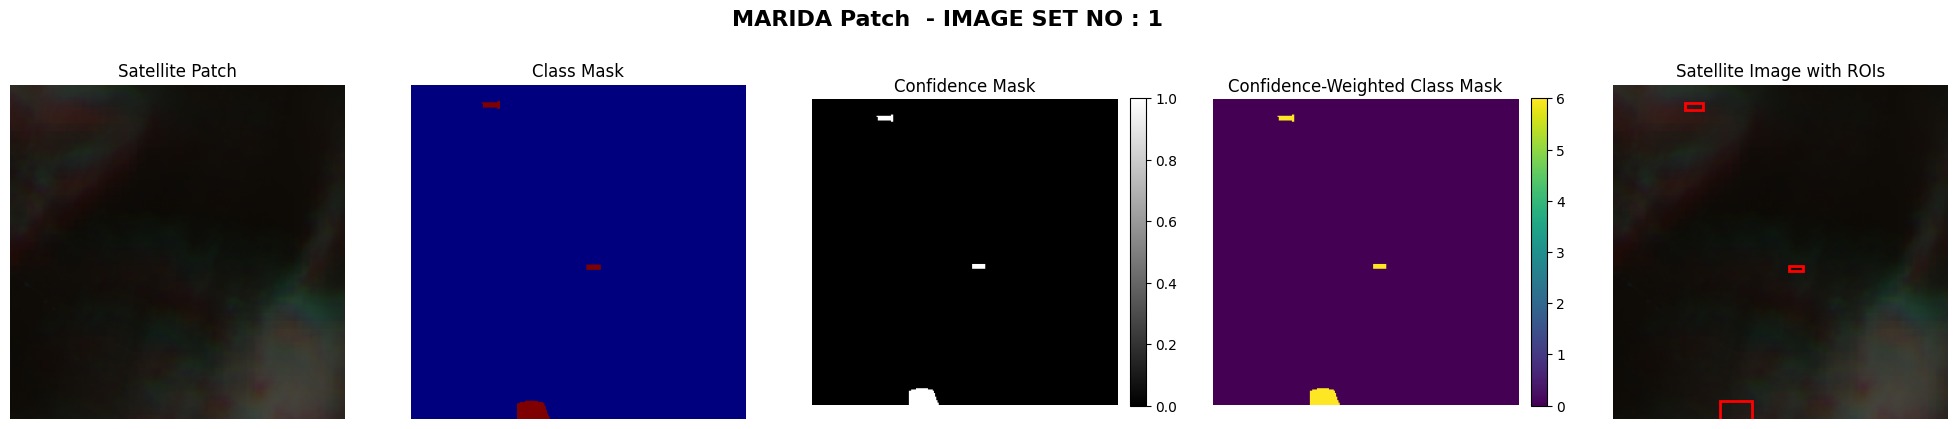

1


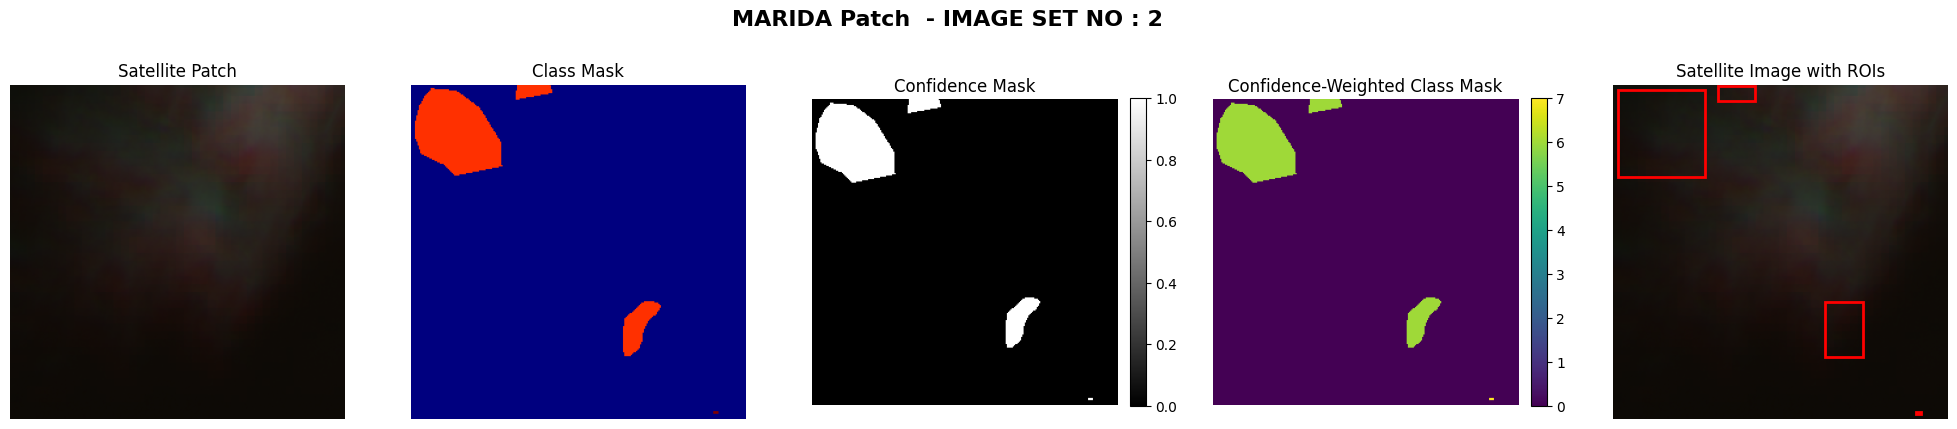

2


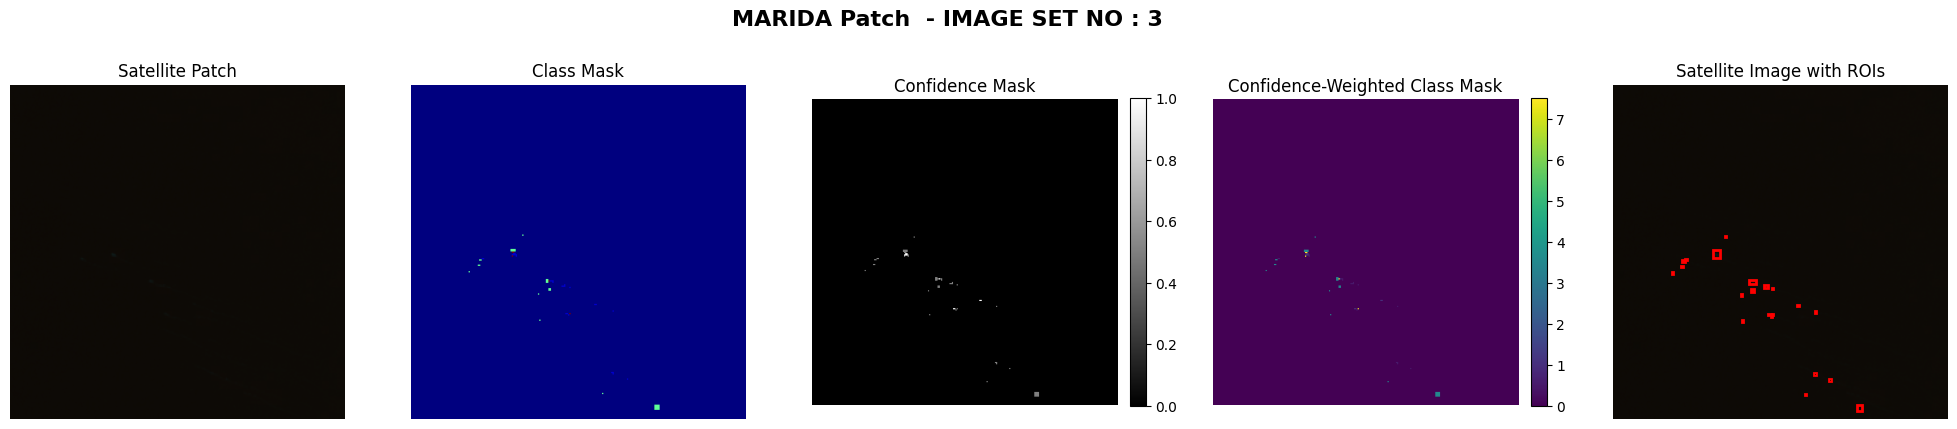

3


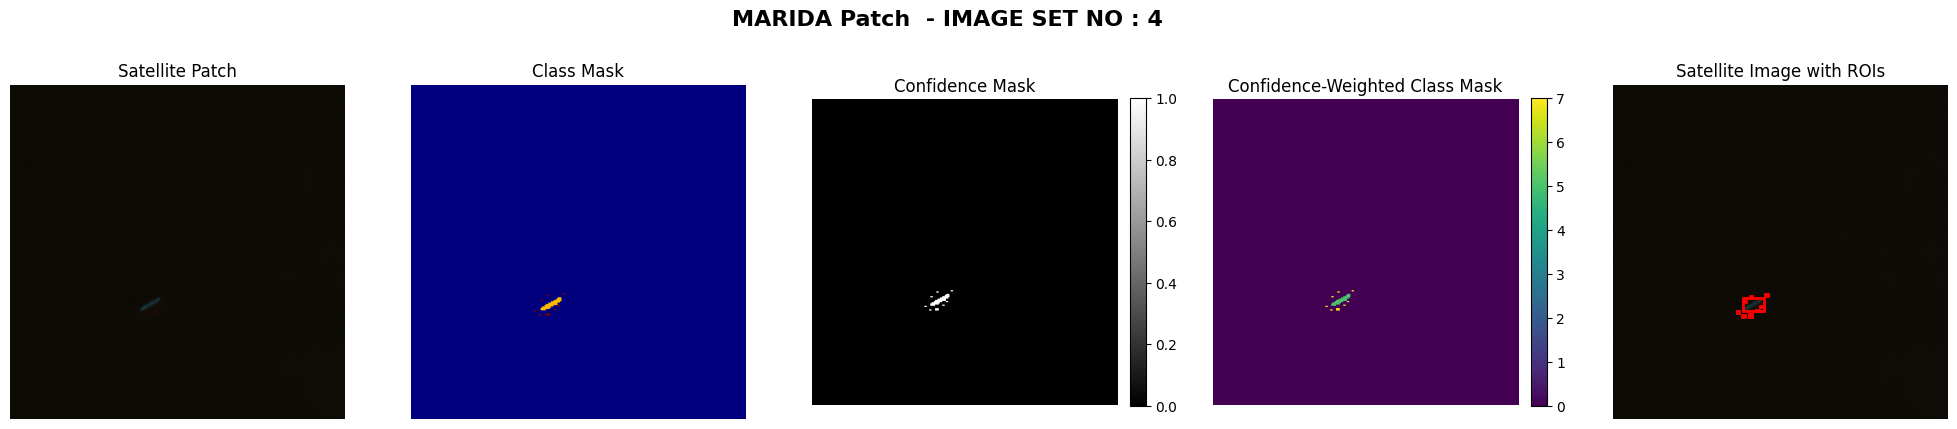

In [ ]:
def display_patch(patch_path):
  patch_len = len(os.listdir(dataset_path  + patch_path))
  # print(patch_len)

  for i in range( patch_len // 3   ):
    print(i)
    display_marida_instance(f"{patch_path}{patch_path[9:-1]}_{i}.tif" , patch =i+1 )

display_patch("/patches/S2_20-10-20_18QYF/")

# Check shapefiles

In [ ]:
os.listdir(dataset_path + "/shapefiles/")[:4]

['S2_1-12-19_48MYU.cpg',
 'S2_1-12-19_48MYU.dbf',
 'S2_1-12-19_48MYU.prj',
 'S2_1-12-19_48MYU.shp']

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 13.5 MB/s eta 0:00:00


In [ ]:
os.listdir(dataset_path + f"/patches/S2_20-10-20_18QYF/S2_20-10-20_18QYF_")


📌 First few rows of attribute data (from .dbf):
   id  conf  report                                           geometry
0   6     1       3  POLYGON ((750114.614 2072373.308, 750070.527 2...
1   5     1       3  POLYGON ((754495.646 2067553.905, 754499.045 2...
2   1     1       3  POLYGON ((751483.987 2070507.786, 751495.989 2...
3   1     2       3  POLYGON ((751713.876 2070536.675, 751716.956 2...
4   1     1       3  POLYGON ((751743.261 2070535.942, 751745.215 2...

🌍 Coordinate Reference System (CRS):
EPSG:32618

📝 Character Encoding: ISO-8859-1


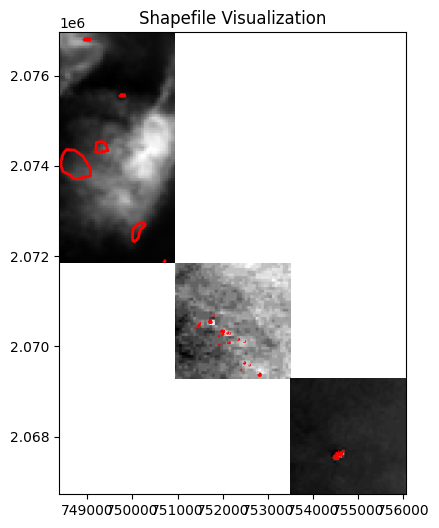

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import os


def visualize_shapefile(shapefile_path, satellite_image_path=None):
    """
    Loads and visualizes a shapefile along with its metadata.
    If a satellite image is provided, it overlays the shapefile on it.

    Args:
        shapefile_path (str): Path to the shapefile (.shp).
        satellite_image_path (str, optional): Path to the satellite image (.tif).
    """

    # Ensure the file exists
    if not os.path.exists(shapefile_path):
        print(f"Error: Shapefile '{shapefile_path}' not found.")
        return

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    print("\n📌 First few rows of attribute data (from .dbf):")
    print(gdf.head())

    # Read CRS (projection)
    print("\n🌍 Coordinate Reference System (CRS):")
    print(gdf.crs)

    # Read .cpg file (encoding, if exists)
    cpg_path = shapefile_path.replace(".shp", ".cpg")
    if os.path.exists(cpg_path):
        with open(cpg_path, "r") as file:
            encoding = file.read().strip()
        print(f"\n📝 Character Encoding: {encoding}")
    else:
        print("\n⚠️ No .cpg file found. Default encoding assumed.")

    # Plot shapefile
    fig, ax = plt.subplots(figsize=(10, 6))

    for sat_image in satellite_image_path:
      if satellite_image_path and os.path.exists(sat_image):
          # Load and display satellite image if provided
          with rasterio.open(sat_image) as src:
              show(src, ax=ax, cmap="gray")  # Display satellite image in grayscale

    # Plot shapefile on top of satellite image (if available)
    gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

    ax.set_title("Shapefile Visualization")
    plt.show()

# Example Usage:
# Load the shapefile
shapefile_path = dataset_path + "/shapefiles" +"/S2_20-10-20_18QYF.shp"

# for i in range(150):
visualize_shapefile(shapefile_path, [dataset_path + f"/patches/S2_20-10-20_18QYF/S2_20-10-20_18QYF_0.tif",
                                     dataset_path + f"/patches/S2_20-10-20_18QYF/S2_20-10-20_18QYF_1.tif",
                                     dataset_path + f"/patches/S2_20-10-20_18QYF/S2_20-10-20_18QYF_2.tif",
                                     dataset_path + f"/patches/S2_20-10-20_18QYF/S2_20-10-20_18QYF_3.tif"])




📌 First few rows of attribute data (from .dbf):
   id  conf  report                                           geometry
0   6     1       3  POLYGON ((750114.614 2072373.308, 750070.527 2...
1   5     1       3  POLYGON ((754495.646 2067553.905, 754499.045 2...
2   1     1       3  POLYGON ((751483.987 2070507.786, 751495.989 2...
3   1     2       3  POLYGON ((751713.876 2070536.675, 751716.956 2...
4   1     1       3  POLYGON ((751743.261 2070535.942, 751745.215 2...

🌍 Coordinate Reference System (CRS):
EPSG:32618

📝 Character Encoding: ISO-8859-1


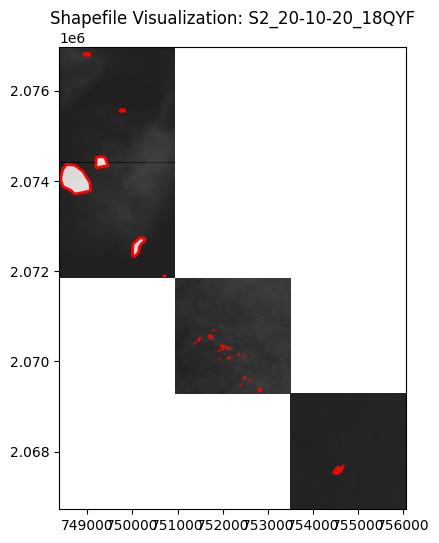

In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import os
import glob

def visualize_shapefile(shapefile_path, dataset_path):
    """
    Loads and visualizes a shapefile along with its metadata.
    Automatically finds all matching satellite images and overlays them.

    Args:
        shapefile_path (str): Path to the shapefile (.shp).
        dataset_path (str): Root dataset directory containing patches.
    """

    # Ensure the shapefile exists
    if not os.path.exists(shapefile_path):
        print(f"Error: Shapefile '{shapefile_path}' not found.")
        return

    # Extract the shapefile base name (without extension)
    shapefile_name = os.path.basename(shapefile_path).replace(".shp", "")

    # Construct the patch directory path
    patches_dir = os.path.join(dataset_path, "patches", shapefile_name)

    # Find all corresponding GeoTIFF (.tif) files
    satellite_images = glob.glob(os.path.join(patches_dir, "*.tif"))

    if not satellite_images:
        print(f"⚠️ No satellite images found for {shapefile_name}.")
        return

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    print("\n📌 First few rows of attribute data (from .dbf):")
    print(gdf.head())

    # Read CRS (projection)
    print("\n🌍 Coordinate Reference System (CRS):")
    print(gdf.crs)

    # Read .cpg file (encoding, if exists)
    cpg_path = shapefile_path.replace(".shp", ".cpg")
    if os.path.exists(cpg_path):
        with open(cpg_path, "r") as file:
            encoding = file.read().strip()
        print(f"\n📝 Character Encoding: {encoding}")
    else:
        print("\n⚠️ No .cpg file found. Default encoding assumed.")

    # Plot the images and shapefile
    fig, ax = plt.subplots(figsize=(10, 6))

    # Loop through and display all satellite images
    for sat_image in satellite_images:
        with rasterio.open(sat_image) as src:
            show(src, ax=ax, cmap="gray", alpha=0.5)  # Adjust alpha for visibility

    # Plot the shapefile on top
    gdf.plot(ax=ax, edgecolor='red', facecolor=(0,0,0,0), linewidth=2)

    ax.set_title(f"Shapefile Visualization: {shapefile_name}")
    plt.show()

# Example Usage:
# dataset_path = "/path/to/dataset"
shapefile_path = os.path.join(dataset_path, "shapefiles", "S2_20-10-20_18QYF.shp")

visualize_shapefile(shapefile_path, dataset_path)
